In [1]:
# 이미지 사진 띄우기
# !pip install IPython 
from IPython.display import Image

In [2]:
import urllib.request
from bs4 import BeautifulSoup
import csv

In [3]:
# Error 406 방지
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
url = 'https://www.melon.com/chart/index.htm'

req = urllib.request.Request(url,headers=headers)
# res = requests.get(url,headers=headers)

html = urllib.request.urlopen(req).read()
# html = urllib.urlopen(url).read() => 이대로 하면 406에러 발생
soup = BeautifulSoup(html, 'html.parser')

# 1. 노래제목, 가수명 각각 출력하기

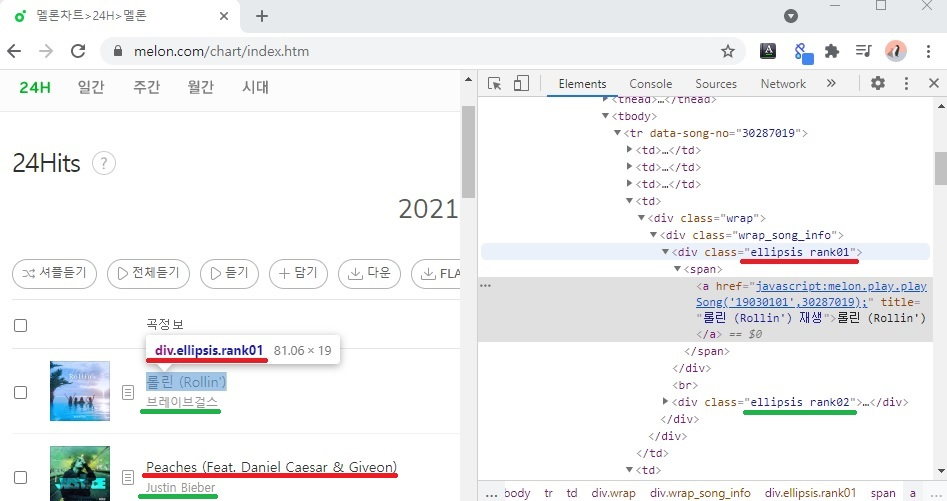

In [4]:
Image("img/rollin.jpg")

## 1-1 첫번째 노래 타이틀만 가져오자

In [5]:
# select로 가져오면 list됨
title = soup.select('.ellipsis.rank01')
print(title[0].text)


롤린 (Rollin')



## 1-1-1 타이틀 목록 전체를 가져오자

In [6]:
for i in title :
    print( i.text)


롤린 (Rollin')


Peaches (Feat. Daniel Caesar & Giveon)


라일락


운전만해 (We Ride)


Celebrity


Timeless


라라라


내사람


Dynamite


내 손을 잡아


Coin


마.피.아. In the morning


LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)


Dun Dun Dance


밝게 빛나는 별이 되어 비춰줄게


On The Ground


멜로디


밤하늘의 별을(2020)


사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)


잠이 오질 않네요


그냥 안아달란 말야


살다가


Blueming


취기를 빌려 (취향저격 그녀 X 산들)


에잇(Prod.&Feat. SUGA of BTS)


어푸 (Ah puh)


Lovesick Girls


VVS (Feat. JUSTHIS) (Prod. GroovyRoom)


나랑 같이 걸을래 (바른연애 길잡이 X 적재)


ASAP


흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야


12:45 (Stripped)


상상더하기


어떻게 이별까지 사랑하겠어, 널 사랑하는 거지


그날에 나는 맘이 편했을까


이 밤을 빌려 말해요 (바른연애 길잡이 X 10CM)


추억은 만남보다 이별에 남아


Dolphin


Savage Love (Laxed - Siren Beat) (BTS Remix)


오래된 노래


맛 (Hot Sauce)


METEOR


2002


모든 날, 모든 순간 (Every day, Every Moment)


힘든 건 사랑이 아니다


아로하


봄 안녕 봄


아이와 나의 바다


너의 발걸음에 빛을 비춰줄게 (Prod. 조영수)


너의 번호를 누르고 (Prod. 영화처럼)


사실 나는 (Feat.전건호)


어떻게 지내 (Prod. By VAN.C)


작은 것들을 위한 시 (Boy With Luv) (Feat. Hals

## 1-2-1 첫번째 가수 이름을 가져오자

In [7]:
# 구체적으로 지명하지 않아서 이름이 2개 반복된다
singer = soup.select('.ellipsis.rank02')
print(singer[0])
print(singer[0].text)

<div class="ellipsis rank02">
<a href="javascript:melon.link.goArtistDetail('531700');" title="브레이브걸스 - 페이지 이동">브레이브걸스</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('531700');" title="브레이브걸스 - 페이지 이동">브레이브걸스</a></span>
</div>

브레이브걸스브레이브걸스



## 1-2-2 첫번째 가수 이름 하나만 가져오자

In [8]:
singer = soup.select('.ellipsis.rank02 > a') # >는 직전의 하위태그
print(singer[0])

<a href="javascript:melon.link.goArtistDetail('531700');" title="브레이브걸스 - 페이지 이동">브레이브걸스</a>


In [9]:
print(singer[0].text)

브레이브걸스


# 2. 차트 테이블 전체 가져오기
- 노래제목(타이틀)
- 가수명
- 앨범명

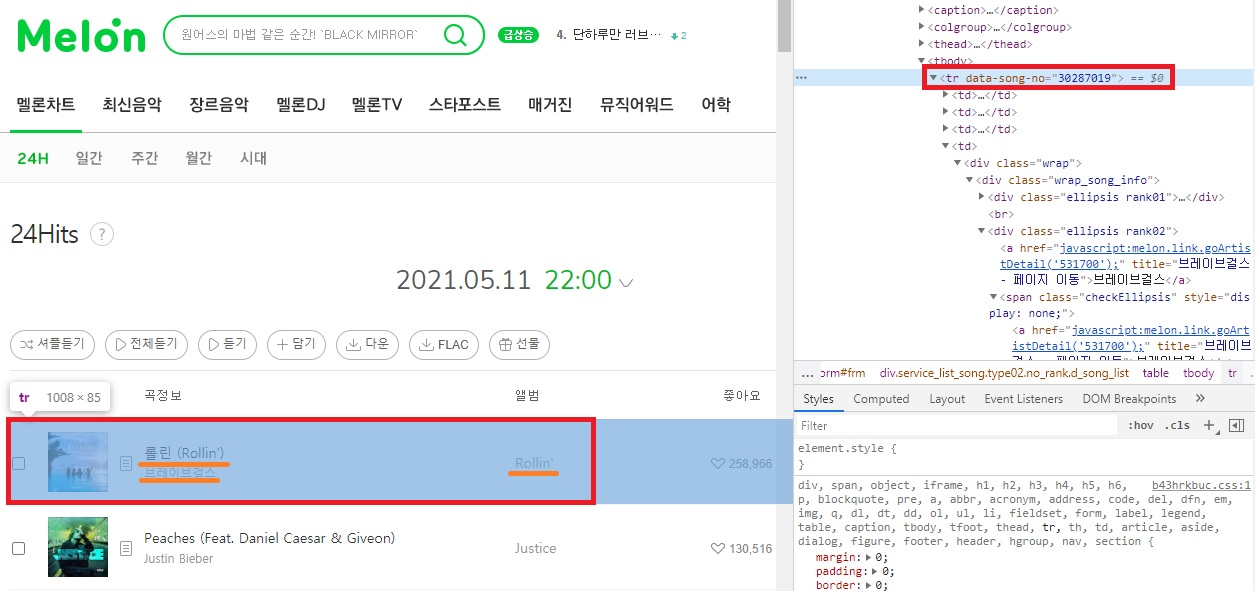

In [10]:
Image("img/chart.jpg")

### Q. 차트테이블을 나타내는 data-song-no의 값은 어떻게 나타내야하는가?
- id값은 #
- class값은 .
- data-song-no값은? 지금은 copy selector로 진행

### 단순하게 text만을 입력하면 빈칸도 함께 출력된다.

In [11]:
chart = soup.select('#frm > div > table > tbody > tr') 

# Q. 반복문에 넣게 되면 타입이 무엇으로 바뀌나? 예전에 정리했던 글을 보자
for i in chart : 
    print(i.select_one('.ellipsis.rank01').text)
    print(i.select_one('.ellipsis.rank02').text)
    print(i.select_one('.ellipsis.rank03').text)
    break


롤린 (Rollin')


브레이브걸스브레이브걸스


Rollin'



### 빈칸이 없도록 하려면 구체적으로 지정해야 한다.

In [12]:
for i in chart : 
    print(i.select_one('.ellipsis.rank01').a.text)
    print(i.select_one('.ellipsis.rank02').a.text)
    print(i.select_one('.ellipsis.rank03').a.text)
    break

롤린 (Rollin')
브레이브걸스
Rollin'


### 한 줄에 출력시키자

In [16]:
j = 1
for i in chart : 
    print("%d위" %j, end=' ')
    print(i.select_one('.ellipsis.rank01').a.text, end=' ')
    print(i.select_one('.ellipsis.rank02').a.text, end=' ')
    print(i.select_one('.ellipsis.rank03').a.text, end=' ')
    print("/n")
    j += 1

1위 롤린 (Rollin') 브레이브걸스 Rollin' /n
2위 Peaches (Feat. Daniel Caesar & Giveon) Justin Bieber Justice /n
3위 라일락 아이유 IU 5th Album 'LILAC' /n
4위 운전만해 (We Ride) 브레이브걸스 We Ride /n
5위 Celebrity 아이유 IU 5th Album 'LILAC' /n
6위 Timeless SG 워너비 Sg Wanna Be+ /n
7위 라라라 SG 워너비 My Friend /n
8위 내사람 SG 워너비 The Precious History /n
9위 Dynamite 방탄소년단 Dynamite (DayTime Version) /n
10위 내 손을 잡아 아이유 최고의 사랑 OST Part.4 /n
11위 Coin 아이유 IU 5th Album 'LILAC' /n
12위 마.피.아. In the morning ITZY (있지) GUESS WHO /n
13위 LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지) 양요섭 LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지) /n
14위 Dun Dun Dance 오마이걸 (OH MY GIRL) Dear OHMYGIRL /n
15위 밝게 빛나는 별이 되어 비춰줄게 송이한 밝게 빛나는 별이 되어 비춰줄게 /n
16위 On The Ground 로제 (ROSÉ) R /n
17위 멜로디 ASH ISLAND 멜로디 /n
18위 밤하늘의 별을(2020) 경서 밤하늘의 별을(2020) /n
19위 사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco) 호미들 사이렌 Remix /n
20위 잠이 오질 않네요 장범준 잠이 오질 않네요 /n
21위 그냥 안아달란 말야 다비치 그냥 안아달란 말야 /n
22위 살다가 SG 워너비 살다가 /n
23위 Blueming 아이유 Love poem /n
24위 취기를 빌려 (취향저격 그녀 X 산들) 산들 취기를 빌려 (취향저격 그녀 X 산들